# Deep Learning の逆誤差伝搬法（バックプロパゲーション）の実装

### 参考
https://qiita.com/Nezura/items/8635d6764e166aa9f87d  

https://ebi-works.com/deeplearning-5/

## 損失関数
正解（教師データ）との隔離度合いを表す。  
よく使われるものに「二乗和誤差」「交差エントロピー」などがある。

### 二乗和誤差
訓練データの結果と教師データの差の二乗を使って二つのズレを評価する。
$$
    E = \frac{1}{2}\sum_{k}{(y_k - t_k)^2}
$$

In [1]:
import numpy as np
def mean_squared_error(y,t):
    return 0.5 * np.sum((y-t)**2)

0.405


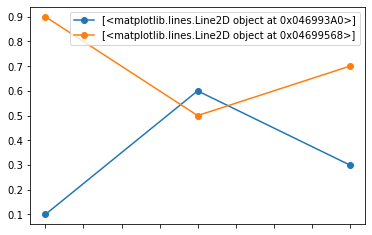

In [2]:
# 計算例
import matplotlib.pyplot as plt

y = np.array([0.1,0.6,0.3]) # 訓練データの結果
t = np.array([0.9,0.5,0.7]) # 教師データ

print(mean_squared_error(y,t))  # 0.405 (= 0.5 * (0.8^2 + 0.1^2 + 0.4^2)

g1 = plt.plot(range(len(y)), y, marker="o")
g2 = plt.plot(range(len(t)), t, marker="o")
plt.legend((g1,g2))
plt.tick_params(labelbottom=False)
plt.show()

## 勾配
DeepLearningでは、損失関数で求めた値ができるだけ小さくなるように重みやバイアスといったパラメータを調整していく。  

そのために重みやバイアスの値を、  
・大きくする必要があるのか  
・小さくする必要があるのか  
を調べて関数の勾配（傾き）を求めることで、
パラメータを調整する方向を定めることができる。

損失関数を微分して得られる。

$$
        \frac{df(x)}{dx} = \lim_{h\to{0}}{\frac{f(x+h)-f(x)}{h}}
$$

ただし、上記の定義では微小幅の分だけ正の方向に偏った位置の傾きが出力されてしまう。  
そこでバランスをとるために書きの式に修正したものを使用する
$$
    \frac{df(x)}{dx} = \lim_{h\to{0}}{\frac{f(x+h)-f(x-h)}{2h}}
$$
※正方向と負方向の両方に微小幅hの幅をとるので、2hで割る必要がある

In [3]:
import matplotlib.pyplot as plt

def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h)-f(x-h)) / (2*h)


# f(x) = x^2の場合
def f(x):
    return x**2

numerical_diff(f, 5) # f(x)' = 2x なので f(5)' = 10

9.999999999976694

# 偏微分
ニューラルネットワークでは各ノードの重みwやバイアスbを大量に含む多次元空間を扱うので、  
各次元についてどちらの方向にパラメータを調整しなければならないのかという「勾配」を求めるために、
損失関数を偏微分（注目する変数のみに対して微分）する必要がある。

In [4]:
# 勾配（偏微分のセット）を求める関数を定義する
import numpy as np

# 勾配関数（xは多数の次元を持つベクトル）
def numerical_gradient(f, x):
    # 微小幅: h
    h = 1e-4
    # grad（勾配）をx配列と同じshape, 同じtypeで定義する
    grad = np.zeros_like(x)

    # xの次元全てにおいて偏微分を求める
    for i in range(x.size):
        tmp = x[i]
        # f(x+h)を求める
        x[i] = tmp + h
        fxh1 = f(x)
        # f(x-h)を求める
        x[i] = tmp - h
        fxh2 = f(x)
        #∂f(x_i)/∂x_iを求める
        grad[i] = (fxh1 - fxh2) / (2*h)
        #x[i]を元に戻す
        x[i] = tmp
    
    return grad




# f(x) = x^2 (つまりf(x)' = 2x) で実装した例
def f(x):
    return np.sum(x**2)

x = np.array([3.0, 4.0, 8.0, -5])
numerical_gradient(f, x)  # [6 (= xが3の時のf=x^2の勾配), 8 (= xが4の時のf=x^2の勾配), 16 , -10]

array([  6.,   8.,  16., -10.])

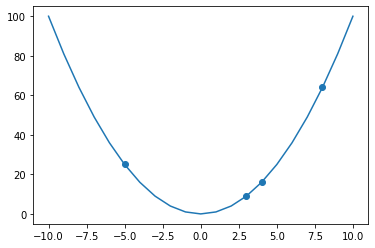

In [5]:
import matplotlib.pyplot as plt

# f(x) = x^2の場合
def f(x):
    return x**2

x = [i for i in range(-10, 11)]
a = [3,4,8,-5]

plt.plot(x, list(map(f,x)))
plt.scatter(a, list(map(f, a)))
plt.show()